In [289]:
%matplotlib notebook

import numpy as np
import cv2
import scipy.cluster.hierarchy
from glob import glob
from PIL import Image
from ipywidgets import interact, fixed, IntSlider
from matplotlib import pyplot as plt
from itertools import islice
from scipy.ndimage import measurements, morphology

In [290]:
def show_images(images):
    fig = plt.figure()
    for i in range(len(images)):
        img = images[i]
        a = fig.add_subplot(1, len(images), i + 1)
        plt.imshow(img, cmap=(None if len(img.shape) == 3 else 'gray'))
        #plt.axis('off')
    plt.show()

def show_rgb(img):
    show_images([img])
    
def show_hsv(images):
    show_images(cv2.cvtColor(img, cv2.COLOR_HSV2RGB) for img in images)

def show_gray(images):
    show_images(images)

<IPython.core.display.Javascript object>


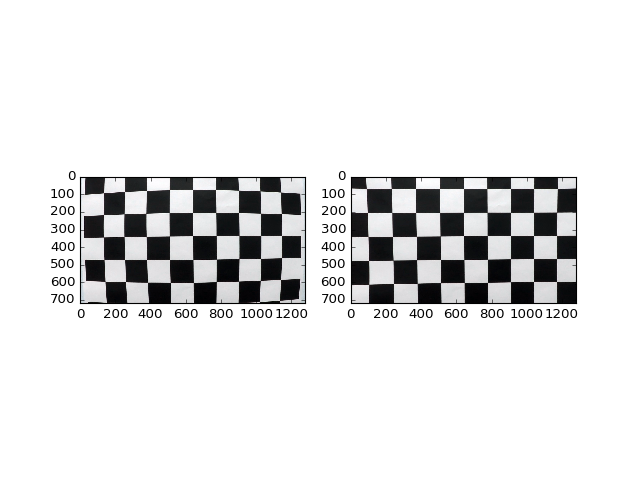

In [291]:
chess_shape = (9, 6)
objpoints = []
imgpoints = []
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1, 2)
for path in glob('camera_cal/*'):
    img = cv2.imread(path) 
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, chess_shape, None)
    
    if ret:
        imgpoints.append(corners)
        objpoints.append(objp)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

for path in islice(glob('camera_cal/*'), 1):
    img = cv2.imread(path)
    dst = undistort(img)
    show_images([img, dst])

<IPython.core.display.Javascript object>


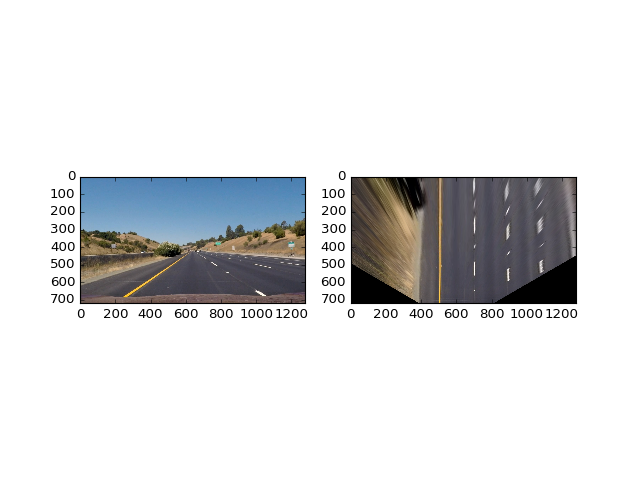

<IPython.core.display.Javascript object>


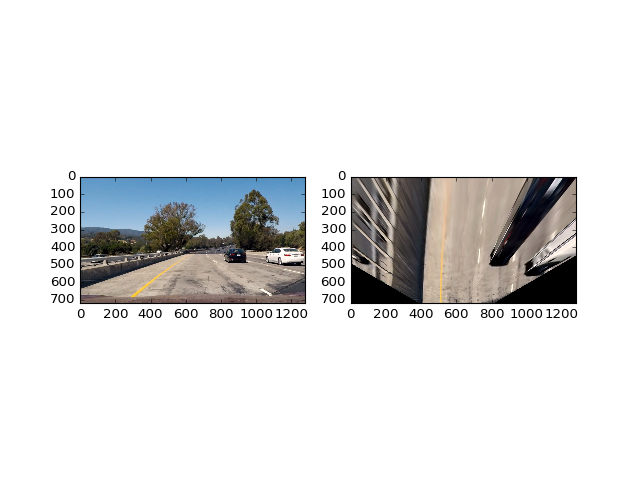

In [292]:
src = np.float32([
        [253, 685],
        [572, 465],
        [709, 465],
        [1052, 685]])

dst = np.float32([
        [500, 750],
        [500, 300],
        [700, 300],
        [700, 750]])

M = cv2.getPerspectiveTransform(src, dst)

def get_road(img):
    img_size = (img.shape[1], img.shape[0])
    # we mostly are interested in upscaling and CUBIC seems to be quite good
    # http://tanbakuchi.com/posts/comparison-of-openv-interpolation-algorithms/
    return cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_CUBIC)
    
for i in islice(glob('test_images3/*'), 2):
    img = np.asarray(Image.open(i))
    road = get_road(img)
    show_images([img, road])


residuals: [  2.26069007e+00  -4.44956430e+01   3.78075829e+02  -1.80994419e+03
   5.33186850e+03  -9.85782003e+03   1.10009853e+04  -6.24936852e+03
   2.22814828e+02   1.62414435e+03  -5.93541431e+02]
rank: [ 1.12591489]
singular_values: 11
rcond: [  3.13318194e+00   1.04627068e+00   2.90572103e-01   6.31336236e-02
   8.30276027e-03   1.27183813e-03   1.23129042e-04   9.32131012e-06
   7.87228707e-07   2.55855523e-08   9.56176776e-10]
pre: 1.11022302463e-14
       10        9         8        7        6        5           4
2.261 y  - 44.5 y + 378.1 y - 1810 y + 5332 y - 9858 y + 1.1e+04 y
         3         2
 - 6249 y + 222.8 y + 1624 y - 593.5


<IPython.core.display.Javascript object>


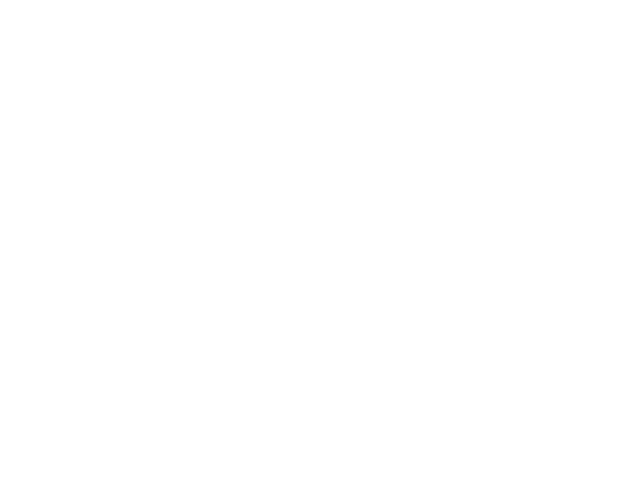

In [54]:
#points = np.random.random((10, 2))
pp = []
for p in [[5, 1], [4, 3], [4.5, 2.5], [4.7, 2.3], [3.9, 2]]:
    for i in range(10):
        pp.append([p[0]+np.random.random()*0.4, p[1]+np.random.random()*0.4])
        
points = np.array(pp)

x = points[:, 0]
y = points[:, 1]

residuals, rank, singular_values, rcond, pre = np.polyfit(y, x, 10, full=True)
print("residuals: %s" % residuals)
print("rank: %s" % rank)
print("singular_values: %s" % singular_values)
print("rcond: %s" % rcond)
print("pre: %s" % pre)

f = np.poly1d(residuals, variable='y')
print(f)

y_new = np.linspace(min(y), max(y), 50)
x_new = f(y_new)

plt.figure()
plt.margins(0.1, 0.1)
plt.plot(x, y, '.', x_new, y_new)
plt.show()

<IPython.core.display.Javascript object>


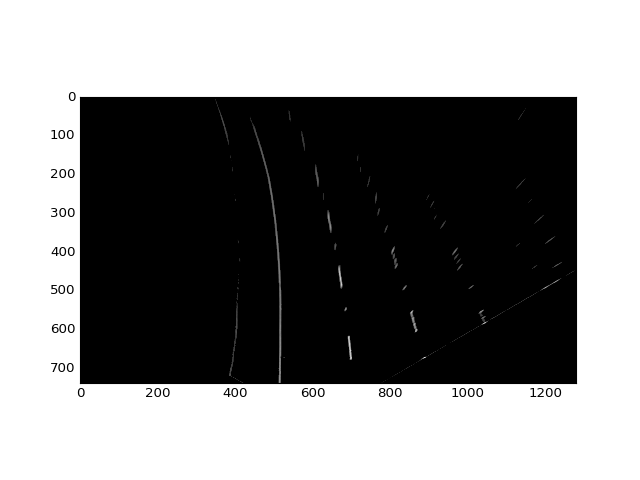

Number of objects: 158


<IPython.core.display.Javascript object>


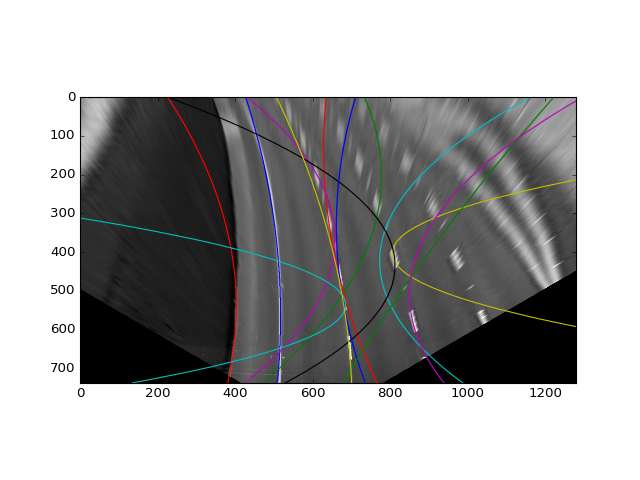

[ -2.82383990e-04   3.18864517e-01   4.27650275e+02]
[ -1.06770783e-03   4.33154179e-01   7.34093445e+02]
[  3.80097676e-04  -1.02657154e-01   6.35585156e+02]
[  2.17074438e-03  -1.83652077e+00   1.16180932e+03]
[ -1.69136327e-03   1.23948238e+00   4.30885056e+02]
[  1.32287729e-02  -1.06504087e+01   2.94914156e+03]
[ -3.10076257e-03   2.69704321e+00   2.26507834e+02]
[  4.50821855e-04  -2.98790970e-01   7.11242035e+02]
[  1.91154587e-04  -8.79612952e-01   1.22248405e+03]
[ -6.00169380e-04   6.52602631e-01   2.26279793e+02]
[ -1.36159644e-02   1.45979370e+01  -3.22697654e+03]
[  1.72019171e-03  -1.75312771e+00   1.29682681e+03]
[ -3.01241707e-04   4.85140331e-01   5.06949001e+02]
New only


<IPython.core.display.Javascript object>


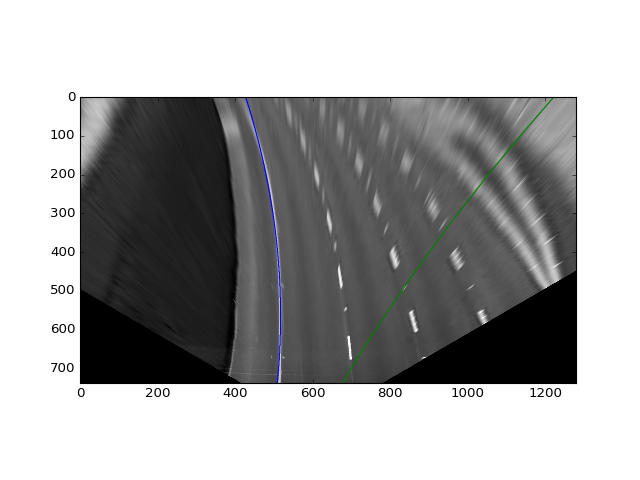

car_offset: -46.69278599514848, curvature: 13008.084366801613


C:\Users\kaspir\Anaconda3\envs\carnd\lib\site-packages\ipykernel\__main__.py:65: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


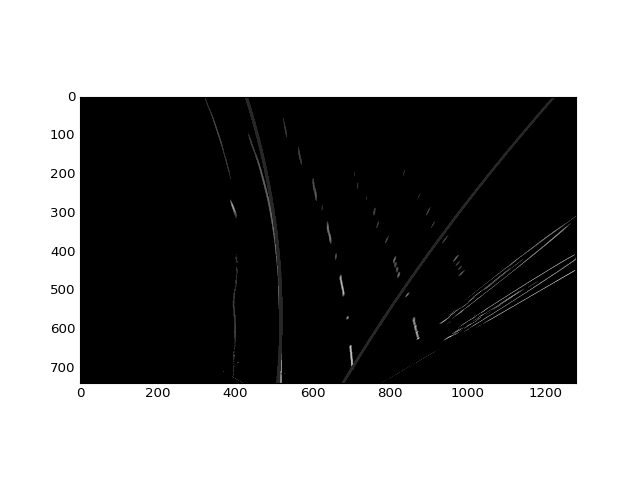

Number of objects: 136


<IPython.core.display.Javascript object>


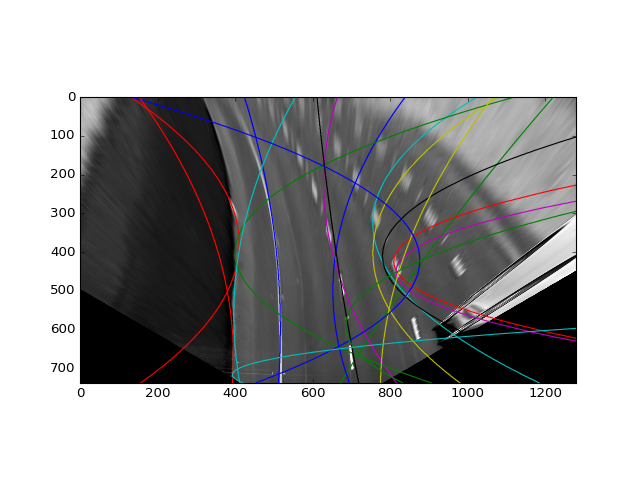

[ -2.59852517e-04   3.10273792e-01   4.24462279e+02]
[  1.67720244e-04  -8.68765714e-01   1.22123122e+03]
[ -1.96138865e-03   1.48051524e+00   1.31135535e+02]
[  2.53214529e-03  -1.64791455e+00   1.02372753e+03]
[  7.09900972e-04  -3.16608534e-01   6.64152419e+02]
[  1.99473345e-03  -1.60286527e+00   1.07787797e+03]
[  5.31448840e-03  -4.34961257e+00   1.67083624e+03]
[  7.49105588e-04  -7.47167703e-01   8.39013727e+02]
[  4.47695651e-03  -3.58924670e+00   1.11997948e+03]
[  1.20452101e-02  -1.02230957e+01   2.97905383e+03]
[  5.02998136e-04  -5.65096977e-01   5.55582839e+02]
[  1.41952266e-02  -1.27469050e+01   3.67742955e+03]
[  5.07042412e-04  -7.67665584e-01   1.06584509e+03]
[  6.80619740e-05   9.56747002e-02   6.11631609e+02]
[ -4.21670573e-03   3.54574182e+00   1.31449040e+02]
[  6.79066160e-03  -8.01578063e+00   3.05124239e+03]
[ -5.40435825e-04   7.25036911e-01   1.52599480e+02]
[  6.19940972e-02  -8.87867450e+01   3.21831176e+04]
Avg with old


<IPython.core.display.Javascript object>


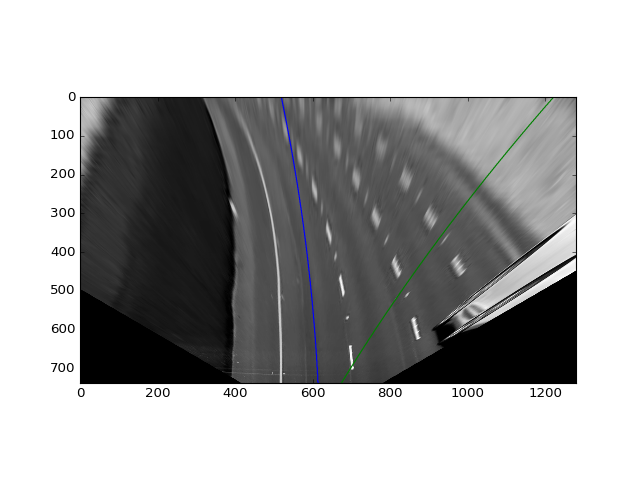

car_offset: 4.338365918730233, curvature: 15495.793537330044


<IPython.core.display.Javascript object>


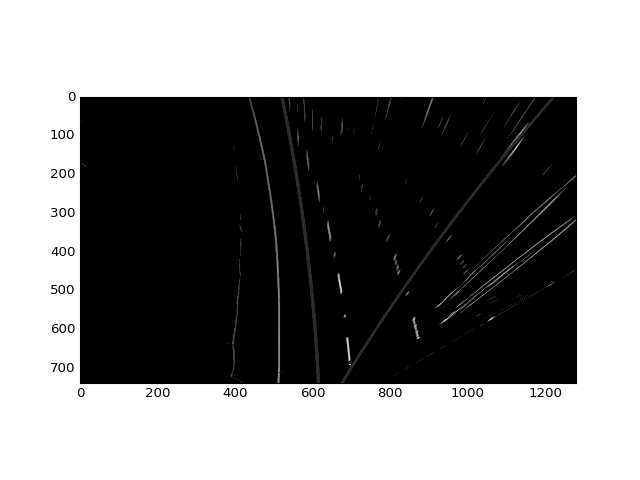

Number of objects: 345


<IPython.core.display.Javascript object>


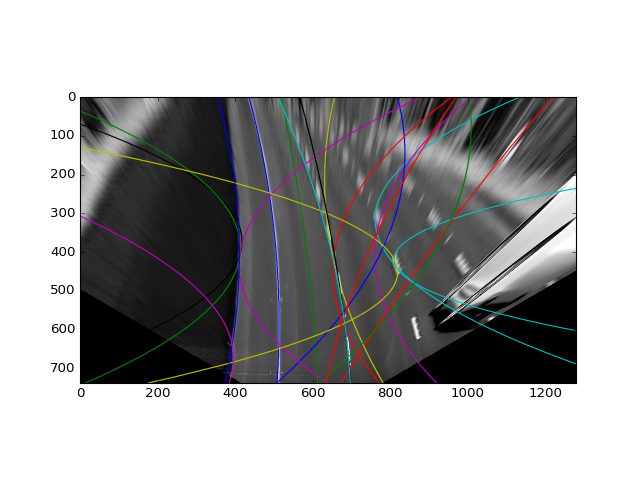

[ -2.27069556e-04   2.65123896e-01   4.36431980e+02]
[ -1.07231157e-04   2.07346713e-01   5.19119704e+02]
[  1.74497120e-04  -8.68735967e-01   1.21992819e+03]
[  3.74043531e-03  -2.36215887e+00   1.13466197e+03]
[  1.48347088e-03  -1.21602911e+00   1.01023870e+03]
[  5.49954942e-04  -2.35068747e-01   6.56401047e+02]
[ -4.55415518e-03   3.38925542e+00  -2.12574751e+02]
[ -9.37450978e-04   2.69227613e-01   8.19067574e+02]
[ -3.30084241e-03   2.57079122e+00  -8.66898648e+01]
[  1.49432310e-03  -1.35416296e+00   9.59184207e+02]
[  1.38644089e-02  -1.16103897e+01   3.24179646e+03]
[  2.49253627e-03  -2.16339415e+00   8.79876759e+02]
[ -7.89196635e-03   7.13148635e+00  -7.91579643e+02]
[ -1.26940569e-04   2.71914657e-01   5.67280440e+02]
[ -3.38279870e-04   2.75161552e-01   3.55254178e+02]
[ -9.01028761e-04   1.39277089e-01   1.00399089e+03]
[  3.28443179e-04  -6.97517734e-01   9.70912113e+02]
[ -2.74396194e-04   4.55764111e-01   5.10467449e+02]
[ -2.93351532e-03   3.95418098e+00  -9.3604685

<IPython.core.display.Javascript object>


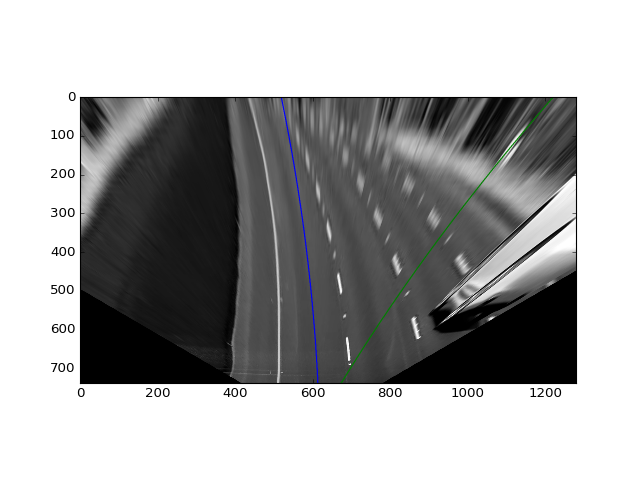

car_offset: 4.063840038424928, curvature: 16058.026471954816


<IPython.core.display.Javascript object>


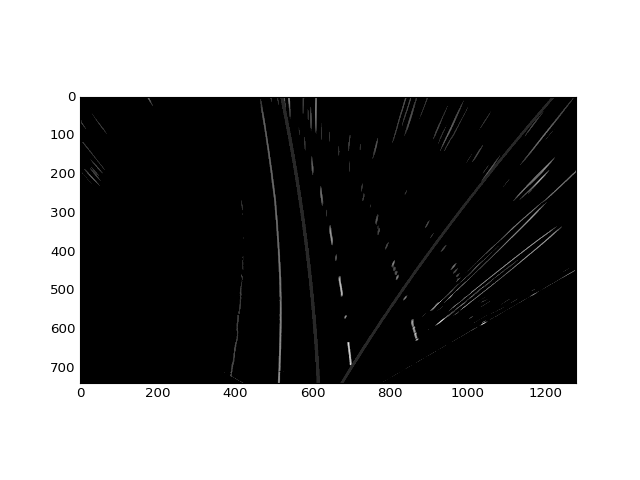

Number of objects: 377


<IPython.core.display.Javascript object>


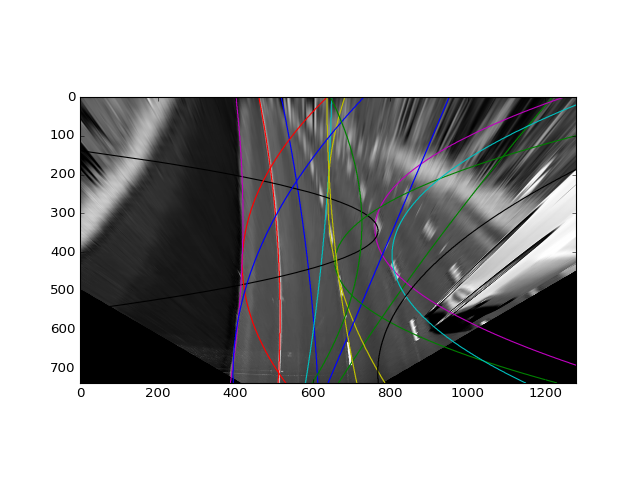

[ -1.04445338e-04   2.04819741e-01   5.19359386e+02]
[  1.49376495e-04  -8.58667220e-01   1.21902250e+03]
[ -1.71126447e-04   1.93461141e-01   4.61637543e+02]
[ -9.44931068e-05  -2.19624783e-02   6.49424978e+02]
[  4.20358814e-03  -2.86047753e+00   1.24803774e+03]
[  6.45375779e-04  -3.35678994e-01   6.83508543e+02]
[ -1.80392244e-02   1.24231997e+01  -1.36978483e+03]
[  7.05133853e-15  -4.23469388e-01   9.52535714e+02]
[  5.86744128e-03  -4.98690784e+00   1.71771990e+03]
[  1.18241063e-03  -1.01634890e+00   6.37265853e+02]
[  3.16324610e-03  -2.57727041e+00   1.33029138e+03]
[ -1.81721217e-04   1.14489628e-01   4.02437472e+02]
[  1.44040562e-04  -1.85108252e-03   6.37392743e+02]
[  1.86657115e-03  -2.65096853e+00   1.70976812e+03]
[  6.60576120e-04  -9.44345720e-01   7.32456216e+02]
[ -7.57410008e-04   4.95014621e-01   6.46405090e+02]
Avg with old


<IPython.core.display.Javascript object>


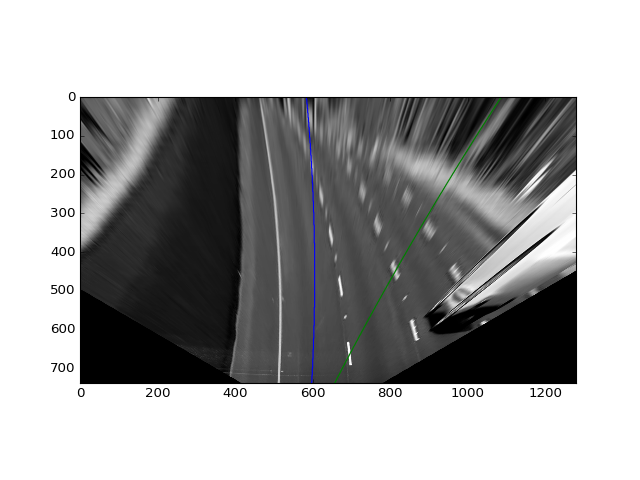

car_offset: -12.526362081388243, curvature: 91063.58084775758


<IPython.core.display.Javascript object>


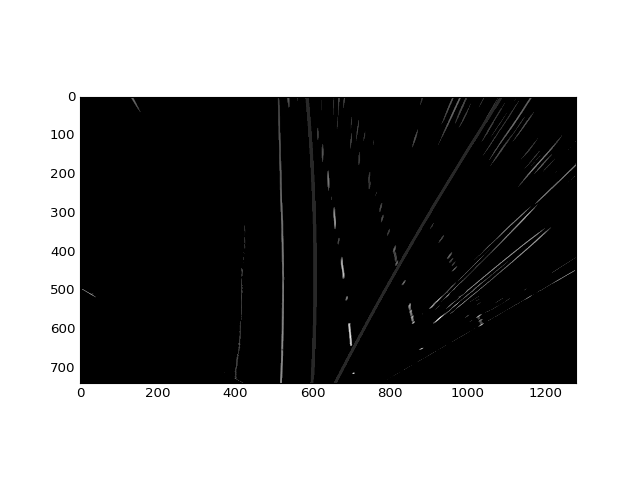

Number of objects: 375


<IPython.core.display.Javascript object>


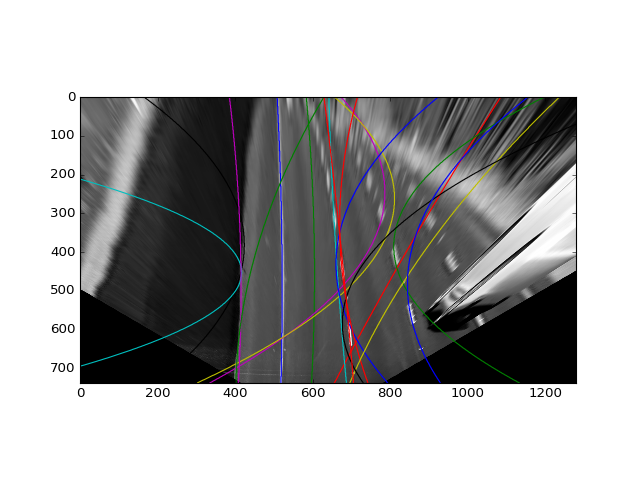

[ -5.28304000e-05   5.22292606e-02   5.08782978e+02]
[ -1.00588574e-04   9.24624257e-02   5.83935348e+02]
[  8.41046934e-05  -6.43471671e-01   1.08542993e+03]
[  4.53891785e-05   2.80390173e-02   6.42174528e+02]
[ -1.86933356e-03   9.18509439e-01   6.73953990e+02]
[ -2.25322929e-03   1.18033280e+00   6.57071660e+02]
[ -1.77740597e-03   1.35498079e+00   1.65794774e+02]
[  1.41848643e-03  -1.22220467e+00   9.23934716e+02]
[  2.61487314e-03  -2.01448211e+00   1.19769432e+03]
[  4.31857695e-04  -2.81898908e-01   7.16009578e+02]
[ -7.15001744e-03   6.47400185e+00  -1.04844384e+03]
[ -1.21643568e-04   1.20898416e-01   3.85624683e+02]
[  4.19898030e-04  -1.04248879e+00   1.23674989e+03]
[  2.28145719e-03  -2.66330548e+00   1.45435113e+03]
[  1.32566142e-03  -1.28359192e+00   1.15572439e+03]
[  3.86286131e-04  -5.92636353e-01   6.29157943e+02]
[ -2.86070655e-05   1.24529467e-01   6.29724620e+02]
Avg with old


<IPython.core.display.Javascript object>


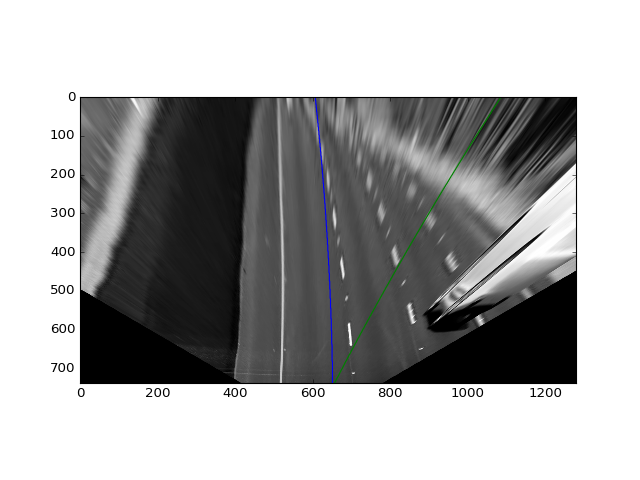

car_offset: 14.337231874657732, curvature: 50868.82119917346


In [354]:
def find_lane_yellow_mask(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    v = hsv[:,:,v]
    mask = np.zeros_like(h)
    mask[(h > 15) & (h <= 31)] = 1
    return mask
    
def find_lane_gray_mask(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    mask = np.zeros_like(gray)
    mask[gray >= 225] = 1
    return mask

def norm(v):
    return np.sqrt(v.dot(v))

def get_line(pixels):
    residuals, rank, singular_values, rcond, pre = np.polyfit(pixels[0], pixels[1], 2, full=True)
    return residuals
        
def show_with_lines(gray, lines):
    fig, ax = plt.subplots()

    for line in lines:
        f = np.poly1d(line)
        ys = np.array(range(0, gray.shape[0]))
        xs = np.int64(f(ys))
        ax.plot(xs, ys)

    marked = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    #marked[np.nonzero(labels)] = [255, 255, 255]
    ax.imshow(marked)
    plt.show()


def find_bright_lanes(img, old_lines):
    g_min = np.min(img)
    g_max = np.max(img)
    
    gray = (img - g_min) / (g_max - g_min)
    
    #show_images([gray])

    line_width = 8
    kernel = np.concatenate((np.repeat(-1, line_width / 2), 
                             np.repeat( 1, line_width), 
                             np.repeat(-1, line_width / 2)))

    kernel = kernel / np.sum(np.abs(kernel))
    kernel = kernel.reshape(1, -1)
    
    conv = cv2.filter2D(gray, -1, kernel)
    #show_images([conv])
    c_max = np.max(conv)
    
    min_conv = 0.05
    
    if old_lines is not None:
        for l in old_lines:
            f = np.poly1d(l)
            for y in range(img.shape[0]):
                x = f(y)
                conv[y, x - line_width / 2 : x + 1 + line_width / 2] = min_conv
    
    conv[conv < min_conv] = 0
    show_images([conv])
    
    
    def extract_lines(labels, object_count):
        print("Number of objects: {}".format(object_count))
        
        lines = []

        for label in range(1, object_count + 1):
            pixels = np.where(labels == label)
            if len(pixels[0]) > 50:
                for p in zip(*pixels):
                    if p[0] > 300 and p[1] > 350 and p[1] < 850:
                        lines.append(get_line(pixels))
                        break
            
        return lines
    

    labels, object_count = measurements.label(conv)    

    lines = extract_lines(labels, object_count)
    show_with_lines(np.uint8(gray * 255), lines)
    
    for l in lines:
        print(l)
        
    sides = [[], []]

    if old_lines is not None:
        for l in lines:
            dd = [norm(np.abs(ol - l) * [0.001, 0.01, 1]) for ol in old_lines]
            if dd[0] < dd[1]:
                sides[0].append(l)
            else:
                sides[1].append(l)
        
    else:
        for l in lines:
            if np.poly1d(l)(img.shape[0]) < img.shape[1] / 2:
                sides[0].append(l)
            else:
                sides[1].append(l)

    for s in sides:
        s.sort(key=lambda l: abs(l[0]))

    return [s[0] for s in sides]
    

def find_lanes(img, old_lines):
    #show_images([img])
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h = hsv[:, :, 0]
    s = hsv[:, :, 1]
    v = hsv[:, :, 2]
    yellow = np.copy(h)
    yo = 2
    yc = 22
    yellow = (yo - np.minimum(np.abs(yellow - yc), yo) * np.float32(255 / yo))
    #yellow = cv2.inRange(h, 18, 30)
    #yellow[(h < 18) | (h > 30)] = 0
    #lane_colors = np.maximum(gray, yellow)
    lane_colors = gray
    new_lines = find_bright_lanes(lane_colors, old_lines)
    
    if old_lines is not None:
        print("Avg with old")
        lines = np.asarray([(o + n) * 0.5 for o, n in zip(old_lines, new_lines)])
    else:
        print("New only")
        lines = new_lines

    #print(lines)
    lane_direction = np.average(lines, axis=0)
    #print(lane_direction)
    
    car_offset = np.poly1d(lane_direction)(img.shape[0]) - img.shape[1]/2
    curvature = (((1 + (2*lane_direction[0]*img.shape[0] + lane_direction[1])**2)**1.5) 
                 / np.absolute(2*lane_direction[0]))

    show_with_lines(gray, lines)
    
    print("car_offset: {}, curvature: {}".format(car_offset, curvature))
    
    return lines
    
    

lines = None
for i in islice(glob('test_images_seq1/*'), 5):
    img = np.array(Image.open(i))
    #show_images([img])
    lines = find_lanes(get_road(img), lines)
    

<IPython.core.display.Javascript object>


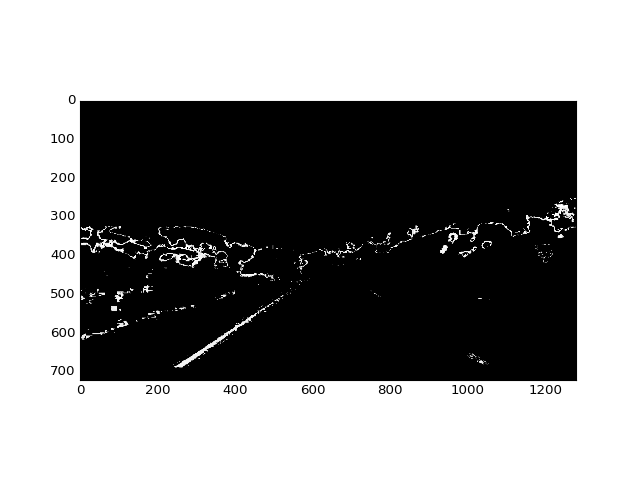

In [247]:
img = np.array(Image.open('test_images3/straight_lines1.jpg'))
    
@interact(img = fixed(img), lh = IntSlider(min=0, max=255, value=15), hh = IntSlider(min=0, max=255, value=31))
def show_hue(img, lh, hh):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h = hsv[:, :, 0]
    h[(h < lh) | (h > hh)] = 0
    #show_images([img])
    plt.figure()
    plt.imshow(h, cmap = 'gray')
    plt.show()
    


In [ ]:
for i in islice(glob('test_images/*'), 8):
    img = np.array(Image.open(i))
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.blur(gray, ksize=(3, 3))
    contours = cv2.findContours(gray, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
    print(contours)
    for j in range(len(contours)):
        cv2.drawContours(img, np.array(contours), j, [255, 0, 0])

In [ ]:
@interact(x=(0, 20))
def update_image(x):
    img = np.asarray(Image.open(i))
    h, w = img.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(img, mask, (345, 647), (255, 0, 0), (x, x, x), (x, x, x))
    plt.imshow(img)